In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from scipy.stats import levene
from scipy.stats import ttest_ind
from scipy import stats
import ptitprince as pt
import seaborn as sns
from IPython.display import display, HTML
pd.options.display.float_format = '{:.3f}'.format

In [3]:
df = pd.read_csv('Invisibility Cloak.csv')


#### Independent samples t-test

Variables:
- **Participant** - Identification number of a participant.
- **Cloak** - Experimental group (0 = without a cloak of invisibility, 1 = with a cloak of invisibility).
- **Mischief** - the number of mischievous acts committed by a participant

#### Assumption Checks

**Assumption 1.**
The dependent variable (Mischief) is a continuous level.\
**Assumption 2.**
The independent variable (Cloak) consists of two categorical, independent
groups (With a cloak, Without a cloak).\
**Assumption 3.**
Each participant is present to only one group.

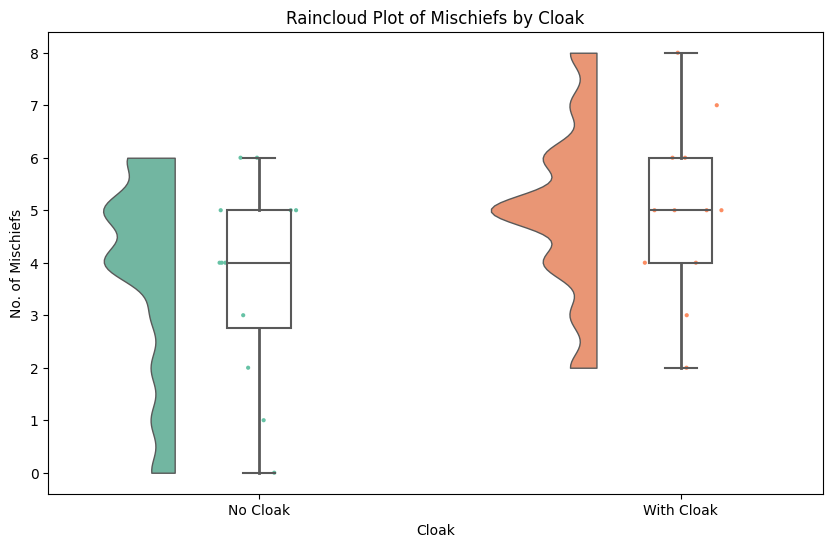

In [4]:
plt.figure(figsize=(10, 6))
pt.RainCloud(data=df, x='Cloak', y='Mischief', width_viol=0.5)
plt.title('Raincloud Plot of Mischiefs by Cloak')
plt.ylabel('No. of Mischiefs')
plt.xticks([0, 1], ['No Cloak', 'With Cloak'])

plt.show()

**Assumption 4. Outliers.**
There are no significant outliers in the two groups of independent
variable (Cloak) in terms of the dependent variable (Mischief), as assessed by visual inspection
of boxplots.\
**Assumption 5. Normality.**
The dependent variable (Mischief) for each group (Cloak) is
normally distributed (p > 0.05), as assessed by Shapiro-Wilk test.

In [5]:
no_cloak = df[df['Cloak'] == 0]['Mischief']
with_cloak = df[df['Cloak'] == 1]['Mischief']

shapiro_no_cloak = shapiro(no_cloak)

shapiro_with_cloak = shapiro(with_cloak)

no_cloak_df = pd.DataFrame({'No Cloak': shapiro_no_cloak}).transpose()
with_cloak_df = pd.DataFrame({'With Cloak': shapiro_with_cloak}).transpose()


display(HTML("""<h5>Test for Normality (Shapiro-Wilk)</h5>"""))
display(pd.concat([no_cloak_df,with_cloak_df]).rename(columns={0:'Statistic', 1:'p-value'}))

,Statistic,p-value
No Cloak,0.913,0.231
With Cloak,0.973,0.936


Remark: Since the p-values (0.231 and 0.936) are greater than 0.05, it can be concluded that both groups are normally distributed.

**Assumption 6. Homogeneity of variances.** There is equality of variances between groups
(Without a cloak, With a cloak) on their number of mischievous acts (Mischief), as assessed by
Levene’s test of equality of variances

In [6]:

levene_test = levene(no_cloak, with_cloak)
levene_df = pd.DataFrame({'Mischief': levene_test}).rename(index={0:'F', 1:'p'}).transpose()
levene_df['df'] =[1]

display(HTML("""<h5>Test of Equality of Variances (Levene's)</h5>"""))
display(levene_df)

,F,p,df
Mischief,0.270,0.609,1


Remark: Since the p-value (0.609) is greater than 0.05, it can be concluded that there is no significant difference between the variances of the two groups.

#### Computation

In [7]:
t_test = ttest_ind(no_cloak, with_cloak)
t_test_df = pd.DataFrame({'Mischief': t_test}).rename(index={0:'t', 1:'p'}).transpose()
t_test_df['df'] = [22]

mean_difference = np.mean(no_cloak) - np.mean(with_cloak)
stdev_no_cloak = np.std(no_cloak, ddof=1)
stdev_with_cloak = np.std(with_cloak,ddof=1)
std_error =  np.sqrt(((stdev_no_cloak)**2/len(no_cloak)) + ((stdev_with_cloak)**2/len(with_cloak)))
t_crit = stats.t.ppf(0.975, 22)

CI_lower = mean_difference - t_crit * std_error
CI_upper = mean_difference + t_crit * std_error

misc = pd.DataFrame({'Mean Difference':[mean_difference], 'SE Difference':[std_error], 'CI Lower': [CI_lower], 'CI Upper': [CI_upper]}).rename(index={0:'Mischief'})
display(HTML("""<h5>Independent Samples T-Test</h5>"""))
display(pd.concat([t_test_df, misc], axis=1))

,t,p,df,Mean Difference,SE Difference,CI Lower,CI Upper
Mischief,-1.713,0.101,22,-1.250,0.730,-2.763,0.263


Remark: The analysis suggest that participants without a cloak commit slightly less number of mischiefs on average than those with a cloak. However, the difference is not statistically significant at the 0.05 level.

**Null Hypothesis** \
$$H_0: \mu_1 = \mu_2 $$

It can be concluded that there is no significant difference between the two groups. This indicate that there is no strong evidence to conclude that the cloak affects the number of mischiefs committed by the participants in this data.

#### Report Summary
**Variables:** 
1. Independent: Cloak
2. Dependent: Mischiefs

**Hypothesis**
- Null Hypothesis ($H_0$): There is no significant difference in the number of mischievous acts committed between two groups.
- Alternative Hypothesis ($H_1$): There is a significant difference in the number of mischievous acts committed between two groups.

An independent samples t-test was conducted to compare the number of mischievous acts committed by individuals wearing and without invisibility cloaks. The results indicated no significant difference between the group with cloaks (M = 5.0, SD = 1.65) and without cloaks (M = 3.75, SD = 1.91), t(22) = - 1.713, p > 0.05. The mean difference obtained was -1.25, with a 95% confidence interval ranging between -2.763 and 0.263. These findings do not imply enough statistical evidence to support the alternative hypothesis, thus we fail to reject the null hypothesis. This analysis suggests that we can conclude that wearing a cloak or not does not significantly affect the number of mischievous acts committed by the individuals. 